In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import OrderedDict

In [2]:
# create a neural network class inheriting from the nn.Module
# Call it NeuralNetwork and make, and use "pass" in the constructor
# so that it doesn't give an error
# Instantiate one instance of it in variable net

net = 0

class NeuralNetwork(nn.Module):
    def __init__(self ):
        super(NeuralNetwork, self).__init__()
        pass

net = NeuralNetwork()

In [3]:
assert isinstance(net, NeuralNetwork)

In [4]:
# Rewrite the NeuralNetwork class so that the constructor receives
# as input the input_dim and num_hidden, respectively the dimension of 
# the input and the number of hidden neurons
# use pass again

class NeuralNetwork(nn.Module):
    pass
    def __init__(self, input_dim, num_hidden):
        super(NeuralNetwork).__init__()
        pass


In [5]:
assert NeuralNetwork(input_dim=10, num_hidden=16)

In [6]:
# Rewrite the NeuralNetwork class so that the constructor receives
# as input the input_dim, num_hidden1 and num_hidden2, respectively the dimension of 
# the input and the number of hidden neurons for the first fully connected
# layer and the second. Define the attributes in the constructor
# that consists of the layers, call them fc1, fc2 and fc3 and a sigmoid.
# use pass again. Be careful to put the dimensions in the right places!
# Since we will do a binary classification problem, fc3 will have 1 neuron
# as output

# class NeuralNetwork(nn.Module):
#     def __init__(self, input_dim, num_hidden1, num_hidden2):
#         super().__init__()
#         self.fc1 = nn.Linear(input_dim, num_hidden1)
#         self.fc2 = nn.Linear(num_hidden1, num_hidden2)
#         self.fc3 = nn.Linear(num_hidden2, 1)      # 1 is for binary classification
#         self.sigmoid = nn.Sigmoid()
    
#     def forward(self, x):
#         layer1 = self.fc1(x)                      # layer = W.X + b
#         act1 = self.sigmoid(layer1)               # activated = sigmoid(layer)
#         layer2 = self.fc2(act1)
#         act2 = self.sigmoid(layer2)
#         layer3 = self.fc3(act2)
#         out = self.sigmoid(layer3)
#         return out
        
        

In [7]:
# net = NeuralNetwork(16, 16, 16)
# assert net.fc1
# assert net.fc2
# assert net.fc3
# assert net.sigmoid

In [21]:
def NeuralNetwork(Features, hidden, target):

	# construct a sequential neural network
	mlpModel = nn.Sequential(OrderedDict([
		("hidden_layer", nn.Linear(Features, hidden)),
		("activation_function", nn.Sigmoid()),
		("output_layer", nn.Linear(hidden, target)),
		("out", nn.Sigmoid())                                       # we use this to get values between 0 and 1
	]))
	
	return mlpModel

In [9]:
# Define the forward pass to make a reasonable use of the attributes
# you defined before. Follow the same reasoning we used in class

model = NeuralNetwork(10, 7, 8)


In [10]:
model.parameters()                      # see weihgt with parameters

<generator object Module.parameters at 0x000001963A94D070>

In [11]:
# For training a model, use the following optimizer and loss

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)           # help to decreses learning rate (lr)

# BCE is Binary Cross Entropy
loss = nn.BCELoss()                                                 # loss function to get min gradient descent


In [12]:
# train a neural network (feel free to choose the num_hidden1 and num_hidden2)
# on the dataset in data.csv file
# You'll have fun with conflicting shapes and types and tensors, but
# you'll get those errors anyway. Let's go into the wild and learn
# by reading the errors and trying to understand them! :)
# You can always use the provided Workbook

In [13]:
data = pd.read_csv('data.csv', header=None)
data

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1
...,...,...,...
95,0.77029,0.701400,0
96,0.73156,0.717820,0
97,0.44556,0.579910,0
98,0.85275,0.859870,0


In [14]:
data.shape

(100, 3)

In [15]:
# create x and y with tensor
X = torch.tensor(data.drop(2, axis=1).values, dtype= torch.float)
y = torch.tensor(data[2].values, dtype= torch.float).reshape(-1, 1)

In [16]:
y

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [23]:
torch.manual_seed(0)
model = NeuralNetwork(X.shape[1], 10, 1)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
loss_fn = nn.BCELoss()

In [24]:
model

Sequential(
  (hidden_layer): Linear(in_features=2, out_features=10, bias=True)
  (activation_function): Sigmoid()
  (output_layer): Linear(in_features=10, out_features=1, bias=True)
  (out): Sigmoid()
)

In [19]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [25]:
losses = []                   
epochs = 500
# pass the data through the model for a number of epochs
for epoch in range(epochs):
    # put model in training model
    model.train()
    # forward pass on train data using the forward() method inside
    y_pred = model(X)
    # calaculate the loss
    loss = loss_fn(y_pred, y)
    # zero the gradients of the optimizer
    optimizer.zero_grad()
    # perform backpropagation on the loss
    loss.backward()
    # progress the optimizer
    optimizer.step()
    # store loss 
    losses.append(loss.detach().item())

In [27]:
print(f'Epoch {epochs}, loss {loss.item():.2f}')

Epoch 500, loss 0.14


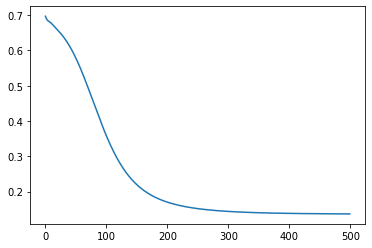

In [26]:
plt.plot(losses)